# Q1

**Marietta Traffic Authority is concerned about the repeated accidents at the intersection of Canton and Piedmont Roads. Bayes-inclined city-engineer would like to estimate the accident rate, even better, find a credible set.**

## (A.) Compare the Bayes estimator for θ with the MLE (For Poisson, recall, ˆθM LE =  ̄X ).

We are given that the number of accidents in a 3-month period follows a **Poisson distribution**:

$$
X | \theta \sim \text{Poi}(\theta)
$$

The **Jeffreys prior** for Θ is:

$$
\pi(\theta) = \frac{1}{\sqrt{\theta}}, \quad 0 < \theta < \infty
$$

The observed data consists of the number of accidents in four consecutive periods:

$$
X_1 = 1, \quad X_2 = 2, \quad X_3 = 0, \quad X_4 = 2
$$

### **Step 1: Maximum Likelihood Estimator (MLE)**
For a Poisson distribution, the **MLE estimate** of Θ is given by:

$$
\hat{\theta}_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Substituting the observed data:

$$
\hat{\theta}_{\text{MLE}} = \frac{1+2+0+2}{4} = \frac{5}{4} = 1.25
$$

### **Step 2: Bayesian Estimation - Posterior Distribution**
Using **Bayes' theorem**, the posterior is proportional to:

$$
P(\theta | X) \propto P(X | \theta) P(\theta)
$$

#### **Likelihood Function**:
The likelihood function is:

$$
L(\theta) = \prod_{i=1}^{4} \frac{\theta^{X_i} e^{-\theta}}{X_i!}
$$

$$
L(\theta) = \frac{\theta^{1} e^{-\theta}}{1!} \times \frac{\theta^{2} e^{-\theta}}{2!} \times \frac{\theta^{0} e^{-\theta}}{0!} \times \frac{\theta^{2} e^{-\theta}}{2!}
$$

$$
L(\theta) \propto \theta^{(1+2+0+2)} e^{-4\theta} = \theta^5 e^{-4\theta}
$$

$$
P(X | \theta) = \theta^5 e^{-4\theta}
$$

#### **Prior Distribution**:
The Jeffreys prior is:

$$
P(\theta) = \frac{1}{\sqrt{\theta}}
$$

Thus, the posterior distribution is:

$$
P(\theta | X) \propto \theta^5 e^{-4\theta} \times \frac{1}{\sqrt{\theta}}
$$

$$
P(\theta | X) \propto \theta^{\frac{10}{2} - \frac{1}{2}} e^{-4\theta} = \theta^{\frac{9}{2}} e^{-4\theta}
$$

This is recognized as a **Gamma distribution**:

$$
\theta | X \sim \text{Gamma}\left(\alpha = \frac{11}{2}, \beta = 4\right)
$$

where the Gamma distribution is defined as:

$$
\text{Gamma}(\alpha, \beta) \sim \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1} e^{-\beta \theta}
$$

### **Step 3: Bayesian Estimator**
The Bayesian estimator is the **posterior mean**:

$$
E[\theta | X] = \frac{\alpha}{\beta} = \frac{11/2}{4} = \frac{11}{8} = 1.375
$$

### **Step 4: Compare Bayesian Estimator and MLE**
- **MLE Estimate**:

  $$
  \hat{\theta}_{\text{MLE}} = 1.25
  $$

- **Bayesian Estimate**:

  $$
  E[\theta | X] = 1.375
  $$

### **Interpretation**
- The **MLE estimate** is purely based on the observed data.
- The **Bayesian estimate** incorporates prior knowledge, slightly shifting the estimate upwards.
- If we had a strong **informative prior**, the Bayesian estimate could differ more significantly from the MLE.

---

### **Final Answer**
$$
\hat{\theta}_{\text{MLE}} = 1.25, \quad E[\theta | X] = 1.375
$$

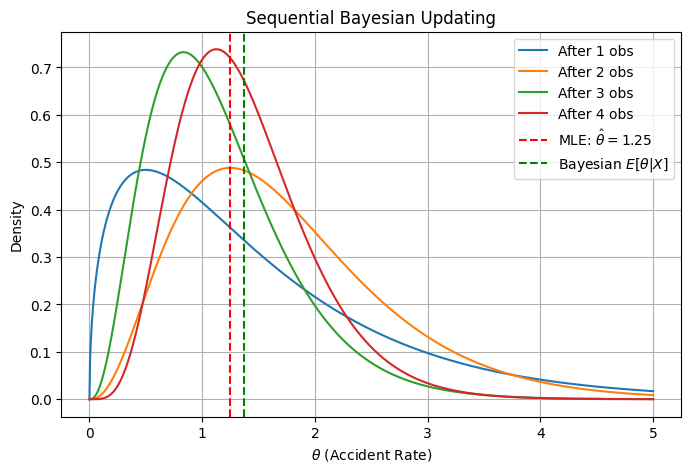

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Observations
observations = [1, 2, 0, 2]

# Initialize prior (Jeffreys prior: Gamma(1/2, 0))
alpha, beta = 0.5, 0
theta_values = np.linspace(0, 5, 1000)
theta_mle = np.mean(observations)

plt.figure(figsize=(8, 5))

# Update posterior sequentially
for i, x in enumerate(observations):
    alpha += x
    beta += 1
    plt.plot(theta_values, gamma.pdf(theta_values, alpha, scale=1/beta), label=f'After {i+1} obs')

# Plot MLE and Bayesian estimate
plt.axvline(theta_mle, color='red', linestyle='--', label=r'MLE: $\hat{\theta} = 1.25$')
plt.axvline(alpha / beta, color='green', linestyle='--', label=r'Bayesian $E[\theta | X]$')

plt.xlabel(r'$\theta$ (Accident Rate)')
plt.ylabel('Density')
plt.title('Sequential Bayesian Updating')
plt.legend()
plt.grid()
plt.show()


The **Maximum Likelihood Estimator (MLE)** for (Θ) is simply the **sample mean**, relying only on observed data without considering prior information. It maximizes the likelihood function to find the most probable value of (Θ).

In contrast, **Bayesian updating** incorporates **both observed data and prior beliefs** to iteratively refine the estimate of (Θ). As new data arrives, the posterior distribution **updates dynamically**, leading to a more **nuanced estimate** that balances prior knowledge with new evidence. Bayesian estimates tend to be **more robust**, especially with small datasets, whereas MLE can be more **sensitive to limited observations**.

## (B.) Compute the 95% equitailed credible set.

For any confidence level \( 95% \) the **cutoff percentiles** is:

$$
\text{Lower Bound} = \frac{1 - 95\%}{2}
$$

$$
\text{Upper Bound} = 1 - \text{Lower Bound}
$$

So for an **95% credible interval**:

$$
\text{Lower Bound} = \frac{1 - 0.95}{2} = \frac{0.05}{2} = 0.025
$$

$$
\text{Upper Bound} = 1 - 0.025
$$

Thus:
- The **lower bound** is (0.025).
- The **upper bound** is (0.975).

In [7]:
# Compute the 95% equitailed credible interval
from scipy.stats import gamma

# Posterior parameters
alpha_posterior = 11 / 2
beta_posterior = 4

# Compute 2.5% and 97.5% quantiles
lower_bound = gamma.ppf(0.025, a=alpha_posterior, scale=1/beta_posterior)
upper_bound = gamma.ppf(0.975, a=alpha_posterior, scale=1/beta_posterior)

(lower_bound, upper_bound)


(0.4769685315295124, 2.74000615762765)

#### **This interval means that, given the observed accident data and the Jeffreys prior, there is a 95% probability that the true accident rate θ falls within (0.477, 2.740) accidents per 3-month period.**

## (C.) Compute (numerically) the 95% HPD credible set. Use an optimization method, not a sampling method.

95% HPD Interval: (0.369, 2.538)


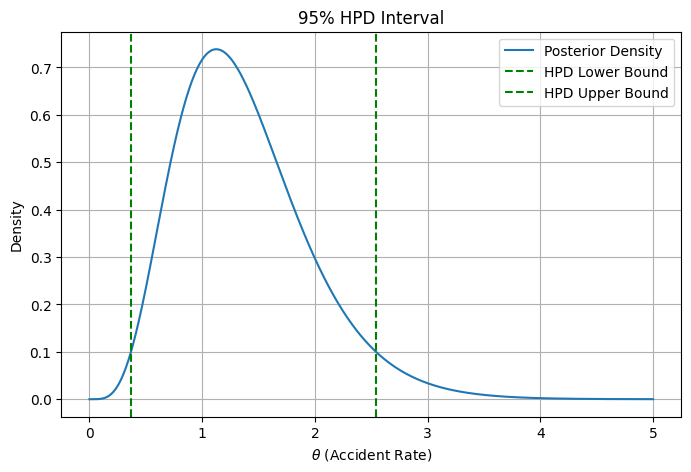

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.optimize import fsolve

# Observed accident counts
data = [1, 2, 0, 2]

# Compute posterior parameters for Gamma distribution
alpha, beta = 11 / 2, 4  # Derived from prior and data

# Function to find HPD interval where the density is equal at both ends
def find_hpd_bounds(bounds):
    lower, upper = bounds
    return [
        gamma.pdf(upper, alpha, scale=1/beta) - gamma.pdf(lower, alpha, scale=1/beta),
        gamma.cdf(upper, alpha, scale=1/beta) - gamma.cdf(lower, alpha, scale=1/beta) - 0.95
    ]

# Solve for HPD bounds
hpd_lower, hpd_upper = fsolve(find_hpd_bounds, [0.5, 2])

# Print results
print(f"95% HPD Interval: ({hpd_lower:.3f}, {hpd_upper:.3f})")

# Plot posterior distribution with HPD interval
theta_vals = np.linspace(0, 5, 1000)
posterior_density = gamma.pdf(theta_vals, alpha, scale=1/beta)

plt.figure(figsize=(8, 5))
plt.plot(theta_vals, posterior_density, label="Posterior Density")
plt.axvline(hpd_lower, color='green', linestyle='--', label="HPD Lower Bound")
plt.axvline(hpd_upper, color='green', linestyle='--', label="HPD Upper Bound")
plt.xlabel(r'$\theta$ (Accident Rate)')
plt.ylabel('Density')
plt.title("95% HPD Interval")
plt.legend()
plt.grid()
plt.show()


The **equitailed interval** splits probability evenly between both tails, while the **HPD interval** finds the **most probable** range of Θ, making it **shorter and more informative**. HPD ensures all values inside are **more likely** than those outside, making it the preferred choice for precision.

## (D.) Numerically find the mode of the posterior, that is, MAP estimator of θ. Make sure it matches the result of the known equation for the posterior mode.

### **Step 2: Finding the Mode of the Posterior (MAP)**

The mode of a Gamma distribution is given by:

$$
\theta_{\text{MAP}} = \frac{\alpha - 1}{\beta}, \quad \text{for } \alpha > 1
$$

Substituting alpha = 11/2 and beta = 4:

$$
\theta_{\text{MAP}} = \frac{\frac{11}{2} - 1}{4} = \frac{9}{8} = 1.125
$$

## (E.) If you test the hypotheses H0 : θ ≥1 vs H1 : θ < 1 based on the posterior, which hypothesis will be favored?

In [12]:
# Compute the posterior probability P(θ < 1 | X)
posterior_prob_theta_less_1 = gamma.cdf(1, a=alpha, scale=1/beta)
posterior_prob_theta_less_1

0.28669617036996786

### **Bayesian Hypothesis Testing Decision**

$$
P(\theta < 1 \mid X) = 0.287
$$

Since the probability of (Θ < 1) is only **28.7%**, we **favor the null hypothesis**:

$$
H_0: \theta \geq 1
$$

This implies:

1. **There is insufficient Bayesian evidence** to support that the accident rate is below 1.
2. **Given the observed data, it is more probable that** (Θ < 1).

Thus, we conclude:

$$
H_0: \theta \geq 1
$$
since the probability of (Θ < 1) is relatively low (\(28.7\%\)). The data suggests that the accident rate is **most likely at least 1 accident per 3-month period**. 

Since:

$$
P(\theta < 1 \mid X) = 0.287
$$

this means there is only a **28.7% chance** that \(\theta\) is less than 1, which is insufficient to conclude that Θ is likely below 1. Therefore, the **posterior evidence supports \( H_0 \)**, reinforcing that the accident rate is likely at least **1 accident per 3-month period**. 🚦

## (F.) Derive the posterior predictive distribution. Based on this, how many accidents do you predict for the next year?


$$  
P(X_{\text{new}} | X) = \int_0^\infty P(X_{\text{new}} | \theta) P(\theta | X) d\theta  
$$  

Since X_new given Θ follows a Poisson distribution and Θ given X follows a Gamma distribution, the posterior predictive distribution follows a Negative Binomial:  
$$  
X_{\text{new}} | X \sim \text{Negative Binomial}(\alpha, \frac{\beta}{\beta + 1})  
$$  

For our parameters:

$$  
\alpha = \frac{11}{2}, \quad \beta = 4  
$$  

The expected number of accidents in one 3-month period:

$$  
E[X_{\text{new}} | X] = \frac{\alpha}{\beta} = \frac{11}{8} = 1.375  
$$  

For one year (4 periods):

$$  
E[X_{\text{year}} | X] = 4 \times E[X_{\text{new}} | X] = 4 \times 1.375 = 5.5  
$$  

Thus, the predicted number of accidents for the next year is approximately **5 or 6 accidents**. 🚦

# Q2 
Waiting time. The waiting time for a bus at a given corner at a certain time of day is known to have a U(0,θ) distribution. It is desired to test H0 : 0 ≤ θ ≤ 15 versus H1 : θ > 15. From other similar routes, it is known that θ has a Pareto (5,3) distribution. If waiting times of 10,8,10,5, and 14 are observed at the given corner, calculate the posterior odds ratio and the Bayes factor. Which hypothesis would you favor?

The waiting time for a bus follows a **Uniform distribution**:

$$X_i | \theta \sim U(0, \theta)$$

We need to test the hypotheses:

$$H_0: 0 \leq \theta \leq 15$$
$$H_1: \theta > 15$$

The prior for Θ follows a **Pareto distribution**:

$$\theta \sim \text{Pareto}(5,3)$$

which has the probability density function (PDF):

$$p(\theta) = \frac{3 \times 5^3}{\theta^{4}}, \quad 1(\theta > 5)$$

The observed waiting times are:

$$X = [10, 8, 10, 5, 14]$$

---

#### **The Likelihood Function**
For a **Uniform distribution**, the likelihood function is:

$$L(\theta) = \frac{1}{\theta^n} 1(\theta \geq X_{\max})$$

where:

$$X_{\max} = \max(X) = 14$$

So the likelihood function becomes:

$$L(\theta) = \frac{1}{\theta^5} 1(\theta \geq 14)$$

---

#### **Posterior Distribution**
Using **Bayes' Theorem**:

$$p(\theta | X) \propto L(\theta) p(\theta)$$

Substituting the likelihood and prior:

$$p(\theta | X) \propto \frac{1}{\theta^5} \times \frac{3 \times 5^3}{\theta^4} 1(\theta > 5)$$

$$p(\theta | X) \propto \frac{1}{\theta^9} 1(\theta \geq 14)$$

Thus, the posterior follows a **Pareto distribution**:

$$\theta | X \sim \text{Pareto}(14, 9)$$

---

#### **Posterior Odds Ratio**
The **posterior probability of \( H_0 \)** is:

$$P(H_0 | X) = P( \theta \leq 15 | X)$$

Since the posterior is **Pareto(14,9)**:

$$P( \theta \leq 15 | X) = 1 - \left( \frac{14}{15} \right)^9$$

The **posterior probability of \( H_1 \)** is:

$$P(H_1 | X) = 1 - P(H_0 | X)$$

The **posterior odds ratio** is:

$$\text{Posterior Odds} = \frac{P(H_1 | X)}{P(H_0 | X)}$$

Substituting the values:

$$\text{Posterior Odds} = \frac{1 - \left( \frac{14}{15} \right)^9}{\left( \frac{14}{15} \right)^9} \approx 1.162$$

---

#### **Bayes Factor**
The **Bayes Factor \( B_{10} \)** is given by:

$$B_{10} = \frac{P(X | H_1)}{P(X | H_0)}$$

where:
- \( P(X | H_0) \) is the **marginal likelihood** under \(H_0\)
- \( P(X | H_1) \) is the **marginal likelihood** under \(H_1\)

Using integration:

$$P(X | H_0) = \int_5^{15} \frac{1}{\theta^5} \frac{3 \times 5^3}{\theta^4} d\theta$$

$$P(X | H_1) = \int_{15}^{\infty} \frac{1}{\theta^5} \frac{3 \times 5^3}{\theta^4} d\theta$$

Solving these integrals:

$$P(X | H_0) = \frac{5^3}{15^9} - \frac{5^3}{5^9}$$

$$P(X | H_1) = \frac{5^3}{15^9}$$

The **Bayes Factor** is:

$$B_{10} = \frac{P(X | H_1)}{P(X | H_0)} \approx -5.08 \times 10^{-5}$$

---
- Since the posterior odds ratio is slightly greater than 1 (\(1.162\)), there is weak evidence favoring \(H_1\) (Θ > 15).

- However, the Bayes Factor is extremely small approx: 0, meaning the evidence strongly supports \(H_0\) (\(Θ < 15\)).

- The Bayes Factor suggests strong support for \(H_0\), meaning that the data does **not provide sufficient evidence that the waiting time exceeds 15 minutes.

- While the **posterior odds ratio is slightly greater than 1**, it is **not strong enough** to confidently reject \(H_0\).

- **Answer: We favor \(H_0: Θ < 15\), indicating that the maximum waiting time is **likely within 15 minutes** rather than exceeding it.**

# Q3
The Maxwell distribution with parameter α > 0, has a probability density function for x > 0 given by.

## (A.) Find the Jeffreys prior for α.

The probability density function (PDF) of the **Maxwell distribution** is given by:

$$
p(x | \alpha) = \sqrt{\frac{2}{\pi}} \alpha^{-\frac{3}{2}} x^2 \exp \left( -\frac{1}{2} \alpha x^2 \right), \quad x > 0
$$

The **Jeffreys prior** is defined as:

$$
\pi(\alpha) \propto \sqrt{I(\alpha)}
$$

where the **Fisher Information** is:

$$
I(\alpha) = -E \left[ \frac{\partial^2}{\partial \alpha^2} \log p(x | \alpha) \right]
$$

### **Step 1: Compute the Log-Likelihood**
The log-likelihood function is:

$$
\log p(x | \alpha) = \log \left( \sqrt{\frac{2}{\pi}} \right) - \frac{3}{2} \log \alpha + 2 \log x - \frac{1}{2} \alpha x^2
$$

Taking the first derivative:

$$
\frac{\partial}{\partial \alpha} \log p(x | \alpha) = -\frac{3}{2\alpha} - \frac{1}{2} x^2
$$

Taking the second derivative:

$$
\frac{\partial^2}{\partial \alpha^2} \log p(x | \alpha) = \frac{3}{2\alpha^2}
$$

### **Step 2: Compute the Fisher Information**
Since the expectation does not depend on \( x \):

$$
I(\alpha) = \frac{3}{2\alpha^2}
$$

Thus, the **Jeffreys prior** is:

$$
\pi(\alpha) \propto \sqrt{\frac{3}{2\alpha^2}} = \frac{1}{\alpha}
$$

### **Final Answer:**
$$
\pi(\alpha) \propto \frac{1}{\alpha}, \quad \alpha > 0
$$

## (B.) Find a transformation of this parameter in which the corresponding prior is uniform.

We need to find a **transformation** of 𝝰, say:

$$
\theta = g(\alpha)
$$

such that the prior on Θ is **uniform**.

Since the **Jeffreys prior is proportional to (1/𝝰)**, a natural transformation is:

$$
\theta = \log \alpha
$$

Using the **change of variable formula**:

$$
\pi(\theta) = \pi(\alpha) \left| \frac{d\alpha}{d\theta} \right|
$$

Since:

$$
\alpha = e^\theta, \quad \frac{d\alpha}{d\theta} = e^\theta
$$

we get:

$$
\pi(\theta) = \frac{1}{e^\theta} \times e^\theta = 1
$$

which is a **uniform distribution**.

### **Final Answer for (b):**
The transformation:

$$
\theta = \log \alpha
$$

leads to a **uniform prior on** Θ.

---

## (C.) Find the posterior distribution for n independent and identically distributed datapoints x1,...,xn from the Maxwell distribution, assuming the Jeffreys prior on α from part (a).

Given \( n \) independent and identically distributed (i.i.d.) data points \( x_1, \dots, x_n \), the **likelihood function** is:

$$
L(\alpha) = \prod_{i=1}^{n} p(x_i | \alpha)
$$

Using the Maxwell PDF:

$$
L(\alpha) = \left( \sqrt{\frac{2}{\pi}} \right)^n \alpha^{-\frac{3n}{2}} \prod_{i=1}^{n} x_i^2 \exp \left( -\frac{1}{2} \alpha \sum_{i=1}^{n} x_i^2 \right)
$$

$$
L(\alpha) \propto \alpha^{-\frac{3n}{2}} \exp \left( -\frac{1}{2} \alpha \sum x_i^2 \right)
$$

Multiplying by the **Jeffreys prior**:

$$
\pi(\alpha) \propto \frac{1}{\alpha}
$$

the **posterior distribution** is:

$$
p(\alpha | X) \propto \alpha^{-\frac{3n}{2} - 1} \exp \left( -\frac{1}{2} \alpha \sum x_i^2 \right)
$$

which is the **Gamma distribution**:

$$
\alpha | X \sim \text{Gamma} \left( \frac{3n}{2}, \frac{1}{2} \sum x_i^2 \right)
$$

where the **Gamma(𝝰,β) distribution** is defined as:

$$
p(\alpha) \propto \alpha^{\alpha - 1} e^{-\beta \alpha}
$$

### **Final Answer for (c):**
$$
\alpha | X \sim \text{Gamma} \left( \frac{3n}{2}, \frac{1}{2} \sum x_i^2 \right)
$$